# My first kaggle exploration: Titanic dataset
## *Jun Zhang*
## Septermber 2016

## 1. Load and preview of data

First, let us have a brief look at data we will be working on.

In [1]:
# Import packages

# pandas
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
# Load the titanic train & test files, and save them as DataFrame

titanic_df = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

# Let us have a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the preview, we can see that, basically, we have the information about each passenger in terms of : sex, name, age, Pclass, number of travelling acommpanies and the port they embarked. We are going to predict the passengers' survival based on these informations.

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In the meantime, we also see that in our training dataset, we have in total 891 observations. Some of the observations don't have the "Age" information and there are a lot of missing values in "Cabin", which may have to be dropped in our analysis.

In [4]:
full_df = pd.concat([titanic_df,test_df], axis = 0)

## 2. Exploratory analysis

In this module, we are going to have a look at the distribution of each variable and identify which 
variables are more important in influencing the final survival result. We will put those variables in our final prediction analysis.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1 "Sex" , "Pclass" and "Embarked"

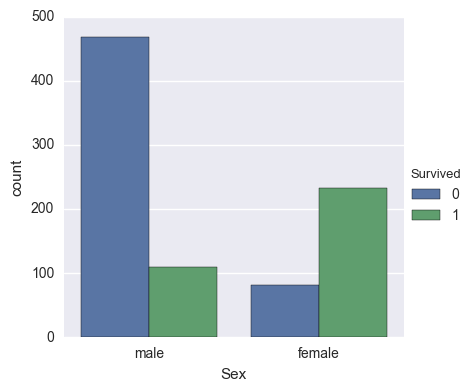

In [6]:
sns.factorplot("Sex", data = titanic_df, kind = 'count',hue = "Survived")

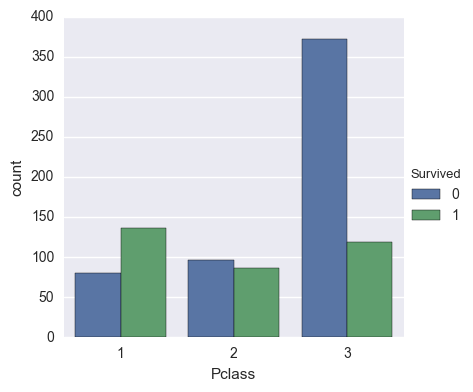

In [7]:
sns.factorplot("Pclass", data = titanic_df, kind = 'count',hue = "Survived")

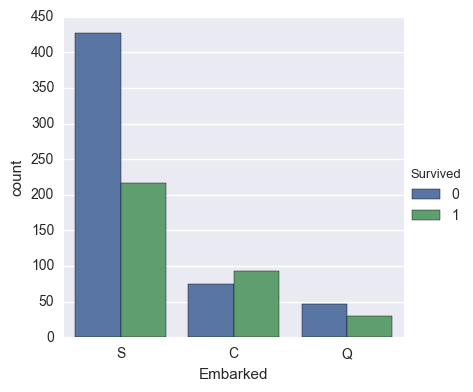

In [8]:
sns.factorplot("Embarked", data = titanic_df, kind = 'count',hue = "Survived")

Obviously, there are much higher possibility to survive for **women**, **first class** and **Embarked Station C**.

### 2.2 Family size

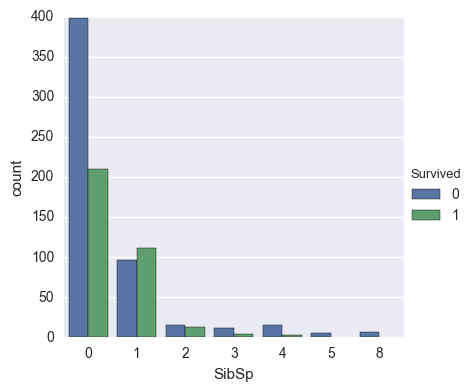

In [9]:
sns.factorplot("SibSp", data = titanic_df, kind = 'count',hue = "Survived")

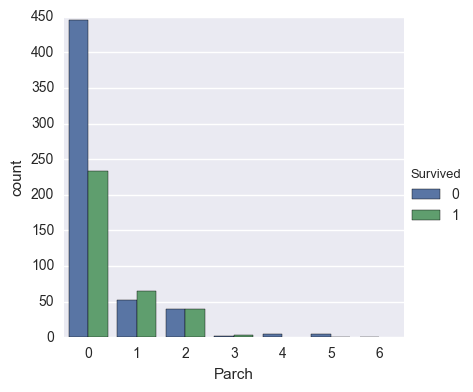

In [10]:
sns.factorplot("Parch", data = titanic_df, kind = 'count',hue = "Survived")

It seems that the **family size** matters. If you are traveling alone, with no siblings/spouse, parents/children, the survival rate is pretty low. However, if your family size is too big, it is also difficult for you to be rescured.

### 2.3 Age

In [11]:
# Assign the ages to bins
age_bins = np.arange(0,90,5)
age_category = pd.cut(full_df.Age, age_bins)

full_df['Age_Cat'] = age_category

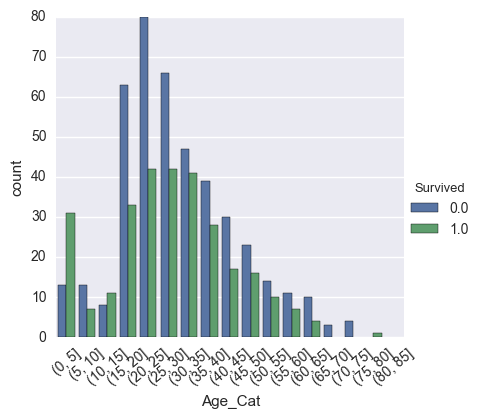

In [12]:
g = sns.factorplot("Age_Cat", data = full_df, kind = 'count',hue = "Survived")
g.set_xticklabels(rotation=40)

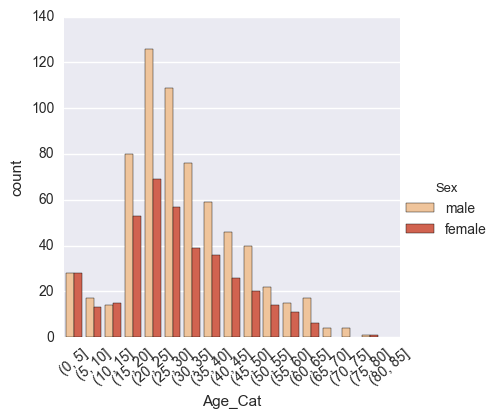

In [13]:
g = sns.factorplot("Age_Cat", data = full_df, kind = 'count',hue = "Sex",palette = 'OrRd')
g.set_xticklabels(rotation=40)

From these plots, we can see that for children < 15, the survival ratio is relatively higher. At other ages, the survival ratio seems pretty similar to the sex ratio, meaning most of the female at that age range survived.

## 3. Feature engineering

Now , we are going to see if we can dig some other information from the data.

In [14]:
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_Cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(20, 25]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(35, 40]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(25, 30]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(30, 35]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(30, 35]"


In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Age_Cat        1046 non-null category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 134.4+ KB


### 3.1 What's in Name?

At first, **Passenger name** seems unrelavant in our prediction. However, after a careful look, I found the "title" is included in the variable, which may provide some insight. 
Format of the "Name" is : (Last name), (title) (middle name) (first name) (other info)

In [16]:
Titles = full_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
Titles.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Name, dtype: int64

In [17]:
def get_titles(df):
    
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
    Title_dict = {
        "Mr" : "Mr",
        "Miss": "Miss",
        "Mrs":"Mrs",
        "Master":"Master",
        "Dr":"Officer",
        "Rev":"Officer",
        "Mlle":"Miss",
        "Col":"Officer",
        "Major":"Officer",
        "Lady":"Royalty",
        "Jonkheer":"Royalty",
        "Don":"Royalty",
        "Dona":"Royalty",
        "Ms":"Mrs",
        "Mme":"Mrs",
        "Capt":"Officer",
        "the Countess":"Royalty",
        "Sir":"Royalty"
        
    }
    
    df['Title'] = df['Title'].map(Title_dict)
    
    return df
    

In [18]:
get_titles(full_df)
full_df.Title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

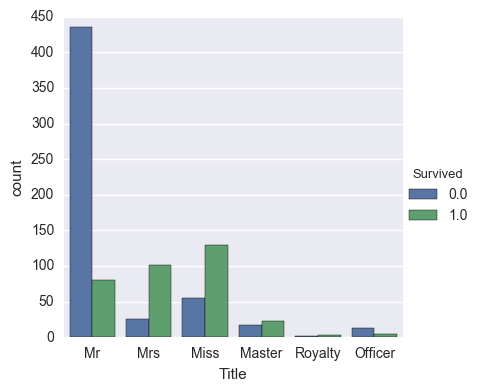

In [19]:
sns.factorplot("Title", data = full_df, kind = 'count',hue = "Survived")

From the title analysis, we can see that the survival rate for "Mrs" are extrmely high, since they are most probably with children. The survival ratio for Miss and Master, Royalty are also highest.

Now, we have determined our candidates for prediction : **Pclass, Title, Sex, Age, SibSp, Parch, and Embarked**.

## 4. Missing value

Before we start the predictive analysis, first we have to check whether there are any missing values in our dataset.

Given the small size of the dataset, we probably should not opt for deleting either entire observations (rows) or variables (columns) containing missing values. We’re left with the option of either replacing missing values with a sensible values given the distribution of the data, e.g., the mean, median or mode. Finally, we could go with prediction. We’ll use both of the two latter methods and I’ll rely on some data visualization to guide our decisions.

### 4.1 Sensible value imputation

In [20]:
# Fill in the 2 missing value for "Embarked"
full_df[pd.isnull(full_df.Embarked)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_Cat,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,"(35, 40]",Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,"(60, 65]",Mrs


We will infer their values for embarkment based on present data that we can imagine may be relevant: passenger class and fare. We see that they paid * 80 * and * 80 *respectively and their classes are 1 and 1 . So from where did they embark?

(0, 200)

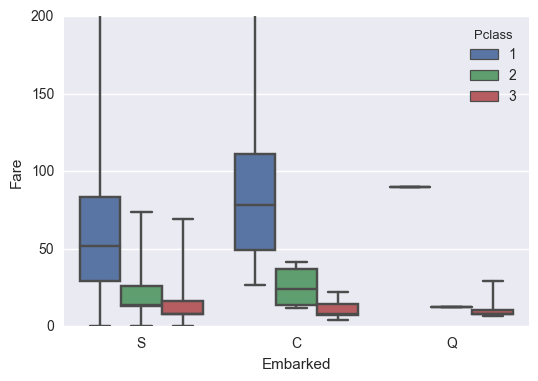

In [21]:
sns.boxplot('Embarked','Fare',data=titanic_df,hue='Pclass',whis=np.inf)
plt.ylim(0,200)

From the plot, we can see for a Fare of 80 of Pclass 1, the passenger is most likely embarked on C

In [22]:
full_df['Embarked'] = full_df['Embarked'].fillna("C")

### 4.2 Predictive imputation

The second variable with quite a few missing values are "Age". However, as we stated, age do have influence in predicting the survival possibility and we can not ignore it.

We are going to impute these missing values with some fancy approaches.The best way is that whether we can deduct the age  from other known information.

In [23]:
full_df.groupby(['Sex','Pclass','Title']).median()

Age      Fare  Parch  PassengerId  SibSp  Survived
Sex    Pclass Title                                                       
female 1      Miss     30.0   99.9625    0.0        529.5    0.0       1.0
              Mrs      45.0   78.1125    0.0        853.5    1.0       1.0
              Officer  49.0   25.9292    0.0        797.0    0.0       1.0
              Royalty  39.0   86.5000    0.0        760.0    0.0       1.0
       2      Miss     20.0   20.2500    0.0        606.5    0.0       1.0
              Mrs      30.0   26.0000    0.0        533.0    1.0       1.0
       3      Miss     18.0    8.0500    0.0        603.5    0.0       0.5
              Mrs      31.0   15.5000    1.0        668.5    1.0       0.5
male   1      Master    6.0  134.5000    2.0        803.0    1.0       1.0
              Mr       41.5   47.1000    0.0        634.0    0.0       0.0
              Officer  52.0   37.5500    0.0        678.0    0.0       0.0
              Royalty  40.0   27.7208    0.0        600.0    0.0       0.0
       2      Master    2.0   26.0000    1.0        550.0    1.0       1.0
              Mr       30.0   13.0000    0.0        723.5    0.0       0.0
              Officer  41.5   13.0000    0.0        513.0    0.0       0.0
       3      Master    6.0   22.3583    1.0        789.0    3.0       0.0
              Mr       26.0    7.8958    0.0        640.5    0.0       0.0

In [24]:
def fill_Ages(row):
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return 30
        elif row['Title'] == 'Mrs':
            return 45
        elif row['Title'] == 'Officer':
            return 49
        elif row['Title'] == 'Royalty':
            return 40

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 20
        elif row['Title'] == 'Mrs':
            return 30

    elif row['Sex']=='female' and row['Pclass'] == 3:
        if row['Title'] == 'Miss':
             return 18
        elif row['Title'] == 'Mrs':
             return 31

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 41
        elif row['Title'] == 'Officer':
            return 52
        elif row['Title'] == 'Royalty':
            return 40

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return 2
        elif row['Title'] == 'Mr':
            return 30
        elif row['Title'] == 'Officer':
            return 41

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 26
        
full_df['Age'] =full_df.apply(lambda r : fill_Ages(r) if pd.isnull(r['Age']) else r['Age'], axis=1)

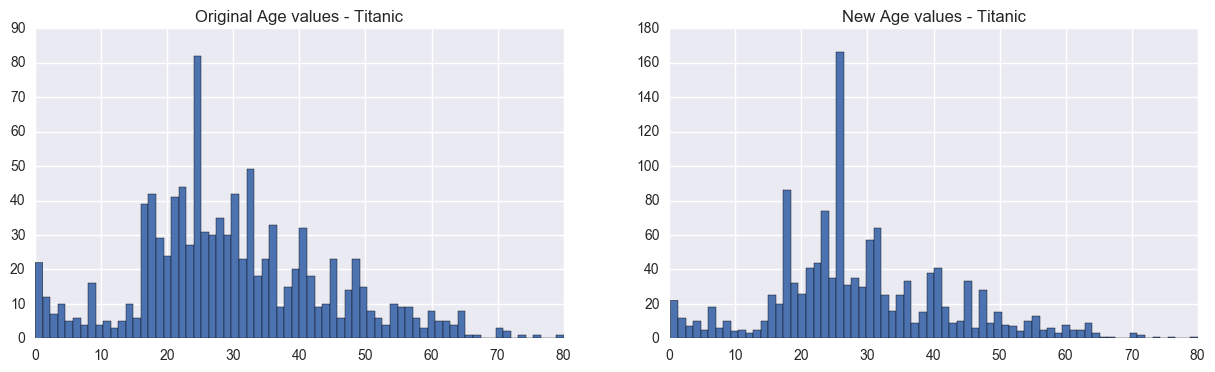

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

origin_df = pd.concat([titanic_df,test_df],axis = 0)

# plot original Age values
# NOTE: drop all null values, and convert to int
origin_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# plot new Age Values
full_df['Age'].hist(bins=70, ax=axis2)

## 5. Prediction Models
### 5.1 Drop the unnecessary columes

In [26]:
full_df = full_df.drop(['Name','Age_Cat','Fare','Cabin','Ticket'], axis=1)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Title          1309 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [27]:
full_df.head()

,Age,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,0,1,3,male,1,0.0,Mr
1,38.0,C,0,2,1,female,1,1.0,Mrs
2,26.0,S,0,3,3,female,0,1.0,Miss
3,35.0,S,0,4,1,female,1,1.0,Mrs
4,35.0,S,0,5,3,male,0,0.0,Mr


### 5.2 Convert  category type to dummy variables

In [28]:
embark_dummies  = pd.get_dummies(full_df['Embarked'])
full_df = pd.concat([full_df,embark_dummies],axis=1)

pclass_dummies  = pd.get_dummies(full_df['Pclass'])
full_df = pd.concat([full_df,pclass_dummies],axis=1)

sex_dummies  = pd.get_dummies(full_df['Sex'])
full_df = pd.concat([full_df,sex_dummies],axis=1)

title_dummies  = pd.get_dummies(full_df['Title'])
full_df = pd.concat([full_df,title_dummies],axis=1)

full_df.head()

,Age,Embarked,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,C,...,2,3,female,male,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,S,0,1,3,male,1,0.0,Mr,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,C,0,2,1,female,1,1.0,Mrs,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,S,0,3,3,female,0,1.0,Miss,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,S,0,4,1,female,1,1.0,Mrs,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,S,0,5,3,male,0,0.0,Mr,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
full_df.drop(['Embarked','Sex','Title','Pclass'], axis=1,inplace=True)

In [30]:
full_df.columns

Index([        u'Age',       u'Parch', u'PassengerId',       u'SibSp',
          u'Survived',           u'C',           u'Q',           u'S',
                    1,              2,              3,      u'female',
              u'male',      u'Master',        u'Miss',          u'Mr',
               u'Mrs',     u'Officer',     u'Royalty'],
      dtype='object')

Remove the multicolinearity

In [31]:
full_df.drop(['C',1,'female','Master'], axis=1,inplace=True)

In [32]:
full_df.describe()

C:\Users\jzhng103\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Age,Parch,PassengerId,SibSp,Survived,Q,S,2,3,male,Miss,Mr,Mrs,Officer,Royalty
count,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.267892,0.385027,655.000000,0.498854,0.383838,0.093965,0.698243,0.211612,0.541635,0.644003,0.200153,0.578304,0.152788,0.017571,0.004584
std,13.437494,0.865560,378.020061,1.041658,0.486592,0.291891,0.459196,0.408607,0.498454,0.478997,0.400267,0.494019,0.359921,0.131435,0.067573
min,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,328.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,655.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,36.500000,0.000000,982.000000,1.000000,NaN,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,80.000000,9.000000,1309.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  5.3 Split into training & test sets

In [33]:
titanic_df=full_df[:891]
test_df=full_df[891:]

X_train = titanic_df.drop(["Survived","PassengerId"],axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop(["Survived","PassengerId"],axis=1).copy()

X_train.head()

,Age,Parch,SibSp,Q,S,2,3,male,Miss,Mr,Mrs,Officer,Royalty
0,22.0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,38.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [34]:
X_test.head()

,Age,Parch,SibSp,Q,S,2,3,male,Miss,Mr,Mrs,Officer,Royalty
0,34.5,0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,47.0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,27.0,0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,22.0,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### 5.4 Building the model

In [35]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Use a single prediction method: Logistic regression/ random forest/ K-neighbors/ SVC

In [36]:
# Computing cross-validation metrics
from sklearn import cross_validation

algorithms = ['Log', 'RF', 'KNN','SVC'] #for classification

def CallAlgorithm(algo):
    return {'RF': RandomForestClassifier(), 
            'Log':LogisticRegression(),
            'KNN':KNeighborsClassifier(),
            'SVC':SVC()}[algo]

N_fold = 5

cv_scores = np.zeros(shape=(len(algorithms),N_fold))

for i,algorithm in enumerate(algorithms):
    clf = CallAlgorithm(algorithm)
    cv_scores[i,:] = cross_validation.cross_val_score(clf,X_train,Y_train, cv = N_fold,scoring = 'accuracy' )

np.mean(cv_scores,axis = 1)

array([ 0.81480548,  0.80141656,  0.80139131,  0.82494958])

It looks like the logistic regression is the best.

In [44]:
ModelType = 'SVC'

if ModelType == "RF":
    
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    score = random_forest.score(X_train, Y_train)
    
elif ModelType == "Log":
    
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    Y_pred = logreg.predict(X_test)
    score = logreg.score(X_train, Y_train)
    
elif ModelType == 'KNN':
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    score = knn.score(X_train, Y_train)
    
elif ModelType == 'SVC':
    
    svc = SVC(C=1000,kernel='rbf',gamma = 0.001)
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    score = svc.score(X_train, Y_train)
    
score    
    

0.83838383838383834

### 5.5 Submission

In [79]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.Survived=submission.Survived.astype(int)
submission.info()
submission.to_csv('titanic_voting.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int32
dtypes: int32(1), int64(1)
memory usage: 8.2 KB


### 5.6 Hyperparameters tuning

In [39]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

In [42]:
parameter_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

cross_validation = StratifiedKFold(Y_train, n_folds=5)

grid_search = GridSearchCV(SVC(C=1),
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, Y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.833894500561
Best parameters: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}


### 5.7 Emsemble methods
### 5.7.1 Voting Ensemble

In [46]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [77]:
num_folds = 5
num_instances = len(X_train)
seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(C=1000,kernel='rbf',gamma = 0.001)
estimators.append(('svm', model3))
model4 = RandomForestClassifier(n_estimators=100)
estimators.append(('rf', model4))
model5 = KNeighborsClassifier(n_neighbors = 3)
estimators.append(('knn', model5))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_validation.cross_val_score(ensemble, X_train, Y_train, cv=kfold)

In [78]:
ensemble.fit(X_train, Y_train)
Y_pred = ensemble.predict(X_test)
score = ensemble.score(X_train, Y_train)
score

0.89113355780022452

### 5.7.2 Stochastic Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

num_folds = 5
num_instances = len(X_train)
seed = 7
num_trees = 100
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold)

In [61]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
score

0.86980920314253651

### 5.7.3 AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

num_folds = 5
num_instances = len(X_train)
seed = 9
num_trees = 30
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold)

In [73]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
score

0.83052749719416386